In [1]:
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from datetime import date
import ast  # Import the Abstract Syntax Trees module

In [2]:
RETRAIN_DATES = [date(2021, 12, 15), date(2022, 12, 15)]

def add_retrain_dates(plt):
    for retrain_date in RETRAIN_DATES:
        plt.axvline(x=retrain_date, color='red', linestyle='--', lw=2)

    # Dynamically adjust the vertical position for annotations to avoid intersection
    # You can adjust 'adjustment_factor' to place the text appropriately
    adjustment_factor = plt.ylim()[1] * 0.99  # Adjust this factor as needed

    # Annotate the red lines, adjusting the y position
    for retrain_date in RETRAIN_DATES:
        plt.text(retrain_date, adjustment_factor, 'Model is retrained', color='red', ha='right', va='top', rotation=45)

In [3]:
# 1overN - 0.34, SPY 0.56 (anual v. 17)

In [8]:
perf = pd.read_csv(fr'.\perfs\whole_period\overfitted_model_perf.csv', index_col=0)
benchmark =  pd.read_csv(fr'.\perfs\whole_period\SPY_perf.csv', index_col=0)
eqp_perf =  pd.read_csv(fr'.\perfs\whole_period\ewp_perf.csv', index_col=0)

In [9]:
strategy_returns = perf['returns']
strategy_returns.index = pd.to_datetime(strategy_returns.index)

benchmark_returns = benchmark['returns']
benchmark_returns.index = pd.to_datetime(strategy_returns.index)

eqp_returns = eqp_perf['returns']
eqp_returns.index = pd.to_datetime(strategy_returns.index)

In [10]:
# Zipline is using parametrc for of ~ 97.5% VaR
returns = perf['returns']

# Set the confidence level
confidence_level = 0.975

# Calculate the VaR threshold
VaR_threshold = returns.quantile(1 - confidence_level)

# Calculate Expected Shortfall as the mean of the returns that are worse than the VaR threshold
ES = returns[returns <= VaR_threshold].mean()
ES

-6.1211381737805715

C:\Users\seidm\miniconda3\envs\ml4t\lib\site-packages\empyrical\stats.py:446: RuntimeWarning: invalid value encountered in double_scalars
  return ending_value ** (1 / num_years) - 1
C:\Users\seidm\miniconda3\envs\ml4t\lib\site-packages\empyrical\stats.py:1495: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Start date,2007-03-19
End date,2023-12-15
Total months,200
,Backtest
Annual return,nan%
Cumulative returns,-6631.369%
Annual volatility,5341.336%
Sharpe ratio,-0.31
Calmar ratio,NaN
Stability,NaN
Max drawdown,-374.742%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,374.74,2008-03-20,2008-07-02,2008-08-04,98
1,179.66,2021-02-17,2022-04-26,NaT,NaN
2,163.12,2018-02-26,2020-03-06,2021-02-16,777
3,94.97,2012-05-25,2013-01-02,2013-06-20,280
4,89.19,2010-05-03,2010-06-07,2010-08-02,66


C:\Users\seidm\miniconda3\envs\ml4t\lib\site-packages\pandas\core\indexes\base.py:5278: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Stress Events,mean,min,max
Lehman,21.76%,-77.54%,293.67%
US downgrade/European Debt Crisis,1.50%,-12.48%,22.41%
Fukushima,-0.56%,-8.26%,8.29%
EZB IR Event,-0.13%,-19.20%,12.37%
Aug07,0.07%,-3.82%,3.89%
Mar08,3.87%,-24.91%,58.34%
Sept08,5.07%,-24.91%,38.74%
2009Q1,-0.61%,-5.35%,5.67%
2009Q2,0.70%,-11.01%,10.04%
Flash Crash,-17.86%,-31.26%,-10.08%


C:\Users\seidm\miniconda3\envs\ml4t\lib\site-packages\pandas\core\indexes\base.py:5278: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


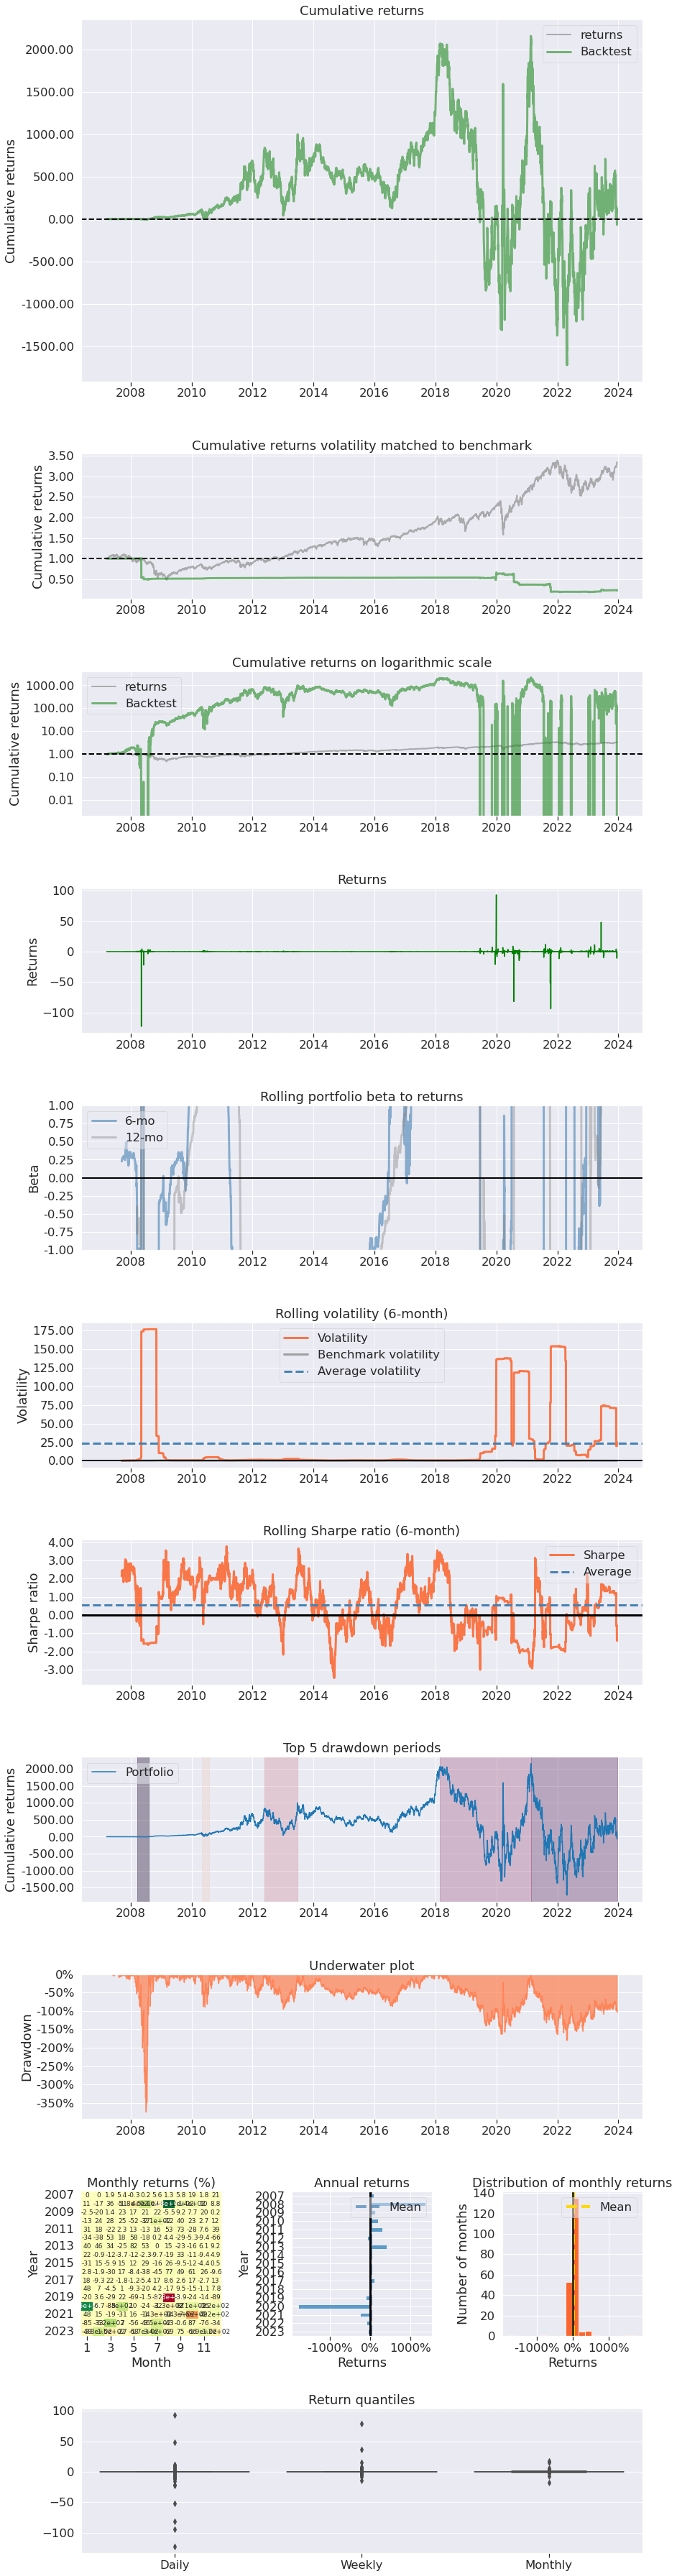

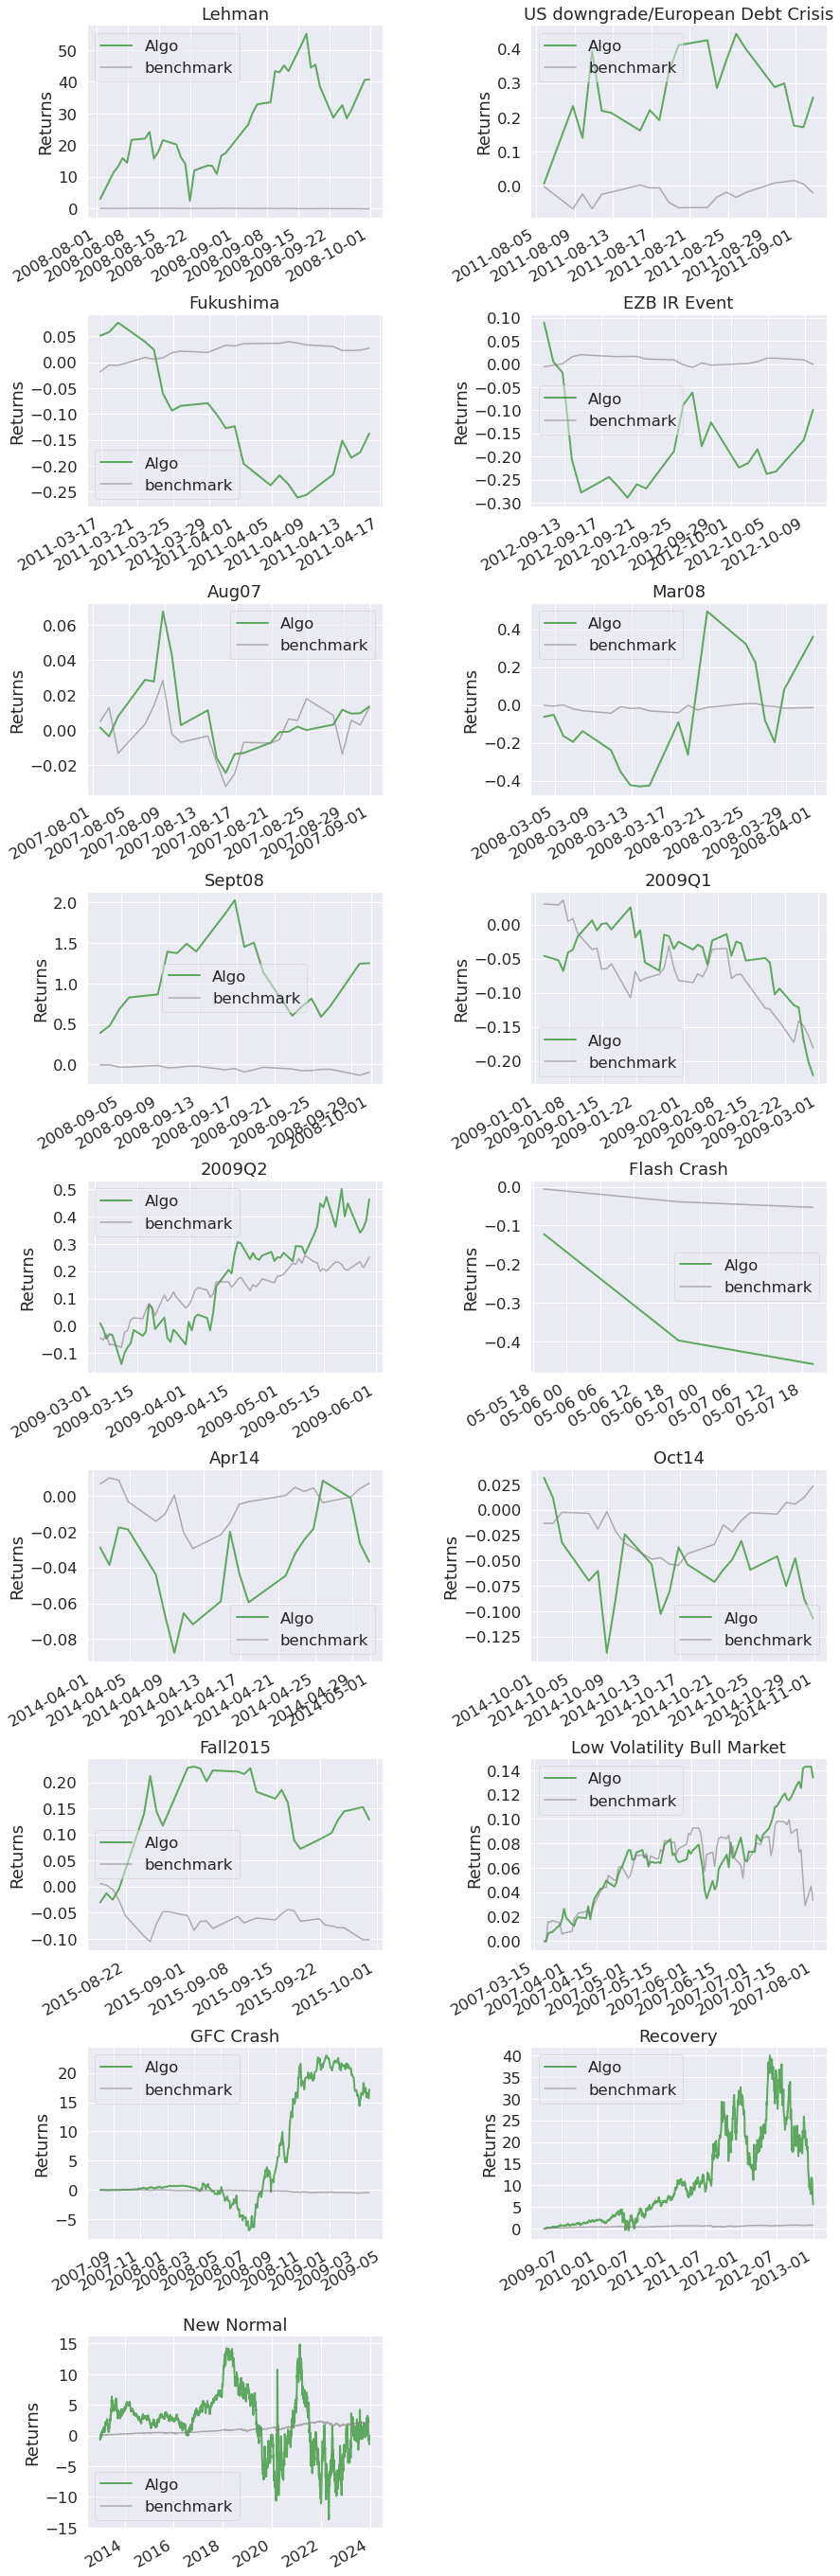

In [11]:
pf.create_full_tear_sheet(strategy_returns, benchmark_rets=benchmark_returns)

# Sharpe Ratio

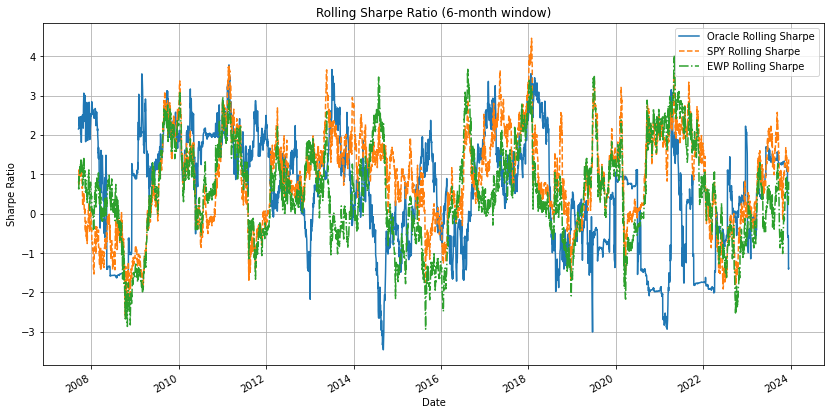

In [13]:
risk_free_rate = 0.0  # Adjust as necessary
window = 126  # 6 months rolling window for daily returns

# Calculate daily excess returns for both strategy and benchmark
excess_returns_strategy = strategy_returns - risk_free_rate
excess_returns_benchmark = benchmark_returns - risk_free_rate
excess_returns_eqp = eqp_returns - risk_free_rate

# Calculate rolling Sharpe ratios for each series
rolling_sharpe_strategy = (excess_returns_strategy.rolling(window=window).mean() / 
                           excess_returns_strategy.rolling(window=window).std()) * np.sqrt(252)

rolling_sharpe_benchmark = (excess_returns_benchmark.rolling(window=window).mean() / 
                            excess_returns_benchmark.rolling(window=window).std()) * np.sqrt(252)

rolling_sharpe_eqp = (excess_returns_eqp.rolling(window=window).mean() / 
                      excess_returns_eqp.rolling(window=window).std()) * np.sqrt(252)

# Plotting the rolling Sharpe ratios
plt.figure(figsize=(14, 7))
rolling_sharpe_strategy.plot(label='Oracle Rolling Sharpe', legend=True)
rolling_sharpe_benchmark.plot(label='SPY Rolling Sharpe', legend=True, linestyle='--')
rolling_sharpe_eqp.plot(label='EWP Rolling Sharpe', legend=True, linestyle='-.')
plt.title('Rolling Sharpe Ratio (6-month window)')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Date')
plt.grid(True)

# Assuming the add_retrain_dates function plots vertical lines or markers at specific dates
#add_retrain_dates(plt)  # Uncomment and define this function based on your needs

plt.show()

# Cumultive Returns 

In [13]:
cumulative_returns_strategy

2007-03-19 20:00:00+00:00      0.000000
2007-03-20 20:00:00+00:00     -0.000379
2007-03-21 20:00:00+00:00      0.006156
2007-03-22 20:00:00+00:00      0.007000
2007-03-23 20:00:00+00:00      0.007270
                                ...    
2023-12-11 21:00:00+00:00     86.682992
2023-12-12 21:00:00+00:00    128.130260
2023-12-13 21:00:00+00:00      5.590516
2023-12-14 21:00:00+00:00    -66.313685
2023-12-15 21:00:00+00:00    -66.313685
Name: returns, Length: 4220, dtype: float64

In [16]:
perf['weights'][200]

'[0.040775299072265625, -0.11291038244962692, -0.19081561267375946, 0.8735690116882324, 0.3893817067146301]'

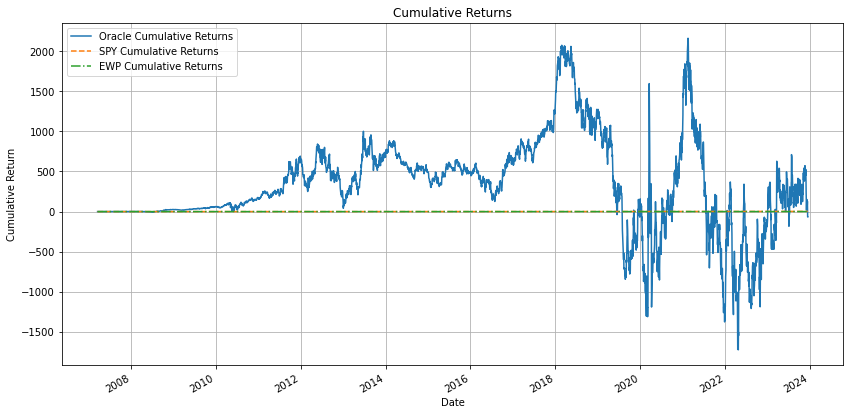

In [12]:
cumulative_returns_strategy = (1 + strategy_returns).cumprod() - 1
cumulative_returns_benchmark = (1 + benchmark_returns).cumprod() - 1
cumulative_returns_eqp = (1 + eqp_returns).cumprod() - 1

# Plot the cumulative returns including eqp_returns
plt.figure(figsize=(14, 7))
cumulative_returns_strategy.plot(label='Oracle Cumulative Returns', legend=True)
cumulative_returns_benchmark.plot(label='SPY Cumulative Returns', legend=True, linestyle='--')
cumulative_returns_eqp.plot(label='EWP Cumulative Returns', legend=True, linestyle='-.')



#add_retrain_dates(plt)

plt.title('Cumulative Returns')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

# Rolling volatility

In [16]:
perf

,period_open,period_close,long_exposure,pnl,short_exposure,capital_used,orders,transactions,gross_leverage,positions,...,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algorithm_period_return,algo_volatility,cumulative_returns
2007-03-19 20:00:00+00:00,2007-03-19 13:31:00+00:00,2007-03-19 20:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,"[{'id': '8a9eff8636ea4cd1958cfc26d16539ab', 'd...",[],0.000000,[],...,NaN,0.000000,0.000000,0.0,0.0,1,2007-03,0.000000,NaN,0.000000
2007-03-20 20:00:00+00:00,2007-03-20 13:31:00+00:00,2007-03-20 20:00:00+00:00,6.570321e+06,-3.787830e+03,-1.005340e+06,-5.568769e+06,"[{'id': '8a9eff8636ea4cd1958cfc26d16539ab', 'd...","[{'amount': -12041, 'dt': Timestamp('2007-03-2...",0.757853,"[{'sid': Equity(4 [VWO]), 'amount': -12041, 'c...",...,-11.224972,-0.000379,0.757853,0.0,0.0,2,2007-03,-0.000379,0.004252,-0.000379
2007-03-21 20:00:00+00:00,2007-03-21 13:31:00+00:00,2007-03-21 20:00:00+00:00,7.079120e+06,6.534959e+04,-1.692450e+06,2.436609e+05,"[{'id': '436330b8d6ef495a8962e32cb32dce1b', 'd...","[{'amount': -8230, 'dt': Timestamp('2007-03-21...",0.871790,"[{'sid': Equity(4 [VWO]), 'amount': -12041, 'c...",...,149.016664,-0.000379,0.871790,0.0,0.0,3,2007-03,0.006156,0.061726,0.006156
2007-03-22 20:00:00+00:00,2007-03-22 13:31:00+00:00,2007-03-22 20:00:00+00:00,7.713805e+06,8.438128e+03,-2.427343e+06,1.086455e+05,"[{'id': '436330b8d6ef495a8962e32cb32dce1b', 'd...","[{'amount': -9069, 'dt': Timestamp('2007-03-22...",1.007065,"[{'sid': Equity(4 [VWO]), 'amount': -12041, 'c...",...,146.625806,-0.000379,1.007065,0.0,0.0,4,2007-03,0.007000,0.051312,0.007000
2007-03-23 20:00:00+00:00,2007-03-23 13:31:00+00:00,2007-03-23 20:00:00+00:00,8.191059e+06,2.699945e+03,-2.429510e+06,-4.723861e+05,"[{'id': 'cd211cb2399c46d5950f4dda576bbcc9', 'd...","[{'amount': 19000, 'dt': Timestamp('2007-03-23...",1.054391,"[{'sid': Equity(4 [VWO]), 'amount': -12041, 'c...",...,136.171272,-0.000379,1.054391,0.0,0.0,5,2007-03,0.007270,0.045665,0.007270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-11 21:00:00+00:00,2023-12-11 14:31:00+00:00,2023-12-11 21:00:00+00:00,2.106577e+11,1.793095e+08,-1.012348e+11,-2.104692e+08,"[{'id': '303ec41cf79a4efd848de3a3cbfb1608', 'd...","[{'amount': -326070, 'dt': Timestamp('2023-12-...",355.704655,"[{'sid': Equity(4 [VWO]), 'amount': 2845184515...",...,-0.349826,-3.747425,9881.113442,0.0,0.0,4216,2023-12,86.682992,53.372261,86.682992
2023-12-12 21:00:00+00:00,2023-12-12 14:31:00+00:00,2023-12-12 21:00:00+00:00,2.113588e+11,4.144727e+08,-1.012009e+11,-3.204848e+08,"[{'id': '303ec41cf79a4efd848de3a3cbfb1608', 'd...","[{'amount': -198320, 'dt': Timestamp('2023-12-...",242.049914,"[{'sid': Equity(4 [VWO]), 'amount': 2846219415...",...,-0.349172,-3.747425,9881.113442,0.0,0.0,4217,2023-12,128.130260,53.366093,128.130260
2023-12-13 21:00:00+00:00,2023-12-13 14:31:00+00:00,2023-12-13 21:00:00+00:00,2.144203e+11,-1.225397e+09,-1.051257e+11,-3.621480e+08,"[{'id': '303ec41cf79a4efd848de3a3cbfb1608', 'd...","[{'amount': -161370, 'dt': Timestamp('2023-12-...",4848.573459,"[{'sid': Equity(4 [VWO]), 'amount': 2847341535...",...,-0.350355,-3.747425,9881.113442,0.0,0.0,4218,2023-12,5.590516,53.360203,5.590516
2023-12-14 21:00:00+00:00,2023-12-14 14:31:00+00:00,2023-12-14 21:00:00+00:00,2.170963e+11,-7.190420e+08,-1.082195e+11,-3.011383e+08,"[{'id': '303ec41cf79a4efd848de3a3cbfb1608', 'd...","[{'amount': -187210, 'dt': Timestamp('2023-12-...",-498.082134,"[{'sid': Equity(4 [VWO]), 'amount': 2848685595...",...,-0.363834,-3.747425,9881.113442,0.0,0.0,4219,2023-12,-66.313685,53.419685,-66.313685


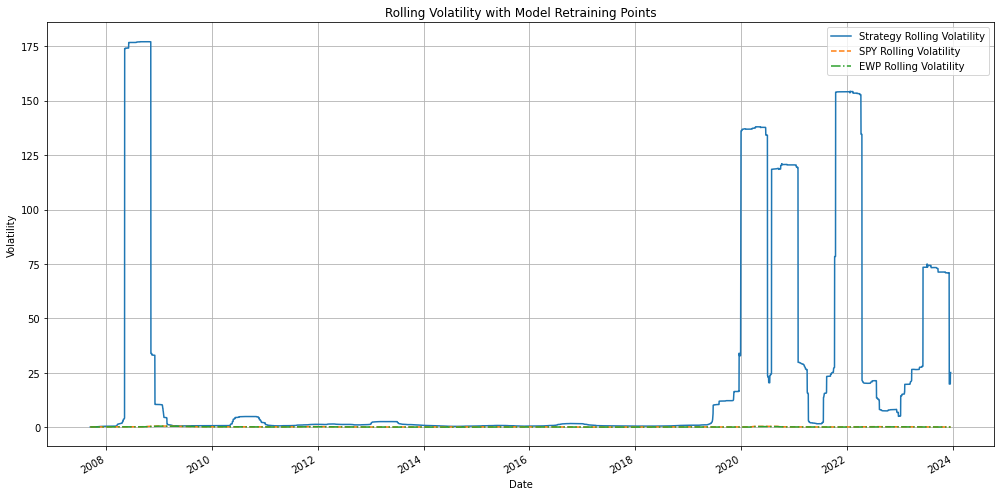

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# Assuming 'strategy_returns' and 'benchmark_returns' are Pandas Series
# of your strategy's and benchmark's daily returns, respectively
window = 126  # Define the rolling window (e.g., 126 trading days for a 6-month window)

# Calculate rolling volatility for both strategy and benchmark
rolling_volatility_strategy = strategy_returns.rolling(window=window).std() * np.sqrt(252)  # Annualize the volatility
rolling_volatility_benchmark = benchmark_returns.rolling(window=window).std() * np.sqrt(252)  # Annualize the volatility
rolling_volatility_eqp = eqp_returns.rolling(window=window).std() * np.sqrt(252)  # Annualize the volatility

# Plot the rolling volatilities including eqp_returns
plt.figure(figsize=(14, 7))
rolling_volatility_strategy.plot(label='Strategy Rolling Volatility', legend=True)
rolling_volatility_benchmark.plot(label='SPY Rolling Volatility', legend=True, linestyle='--')
rolling_volatility_eqp.plot(label='EWP Rolling Volatility', legend=True, linestyle='-.')


plt.title('Rolling Volatility with Model Retraining Points')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to make room for the legend and annotations
#add_retrain_dates(plt)
plt.show()


# Rolling beta

C:\Users\seidm\AppData\Local\Temp\tmphp3ohz2z\ipykernel_8604\3946155852.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rolling_beta = pd.Series(index=strategy_returns.index)


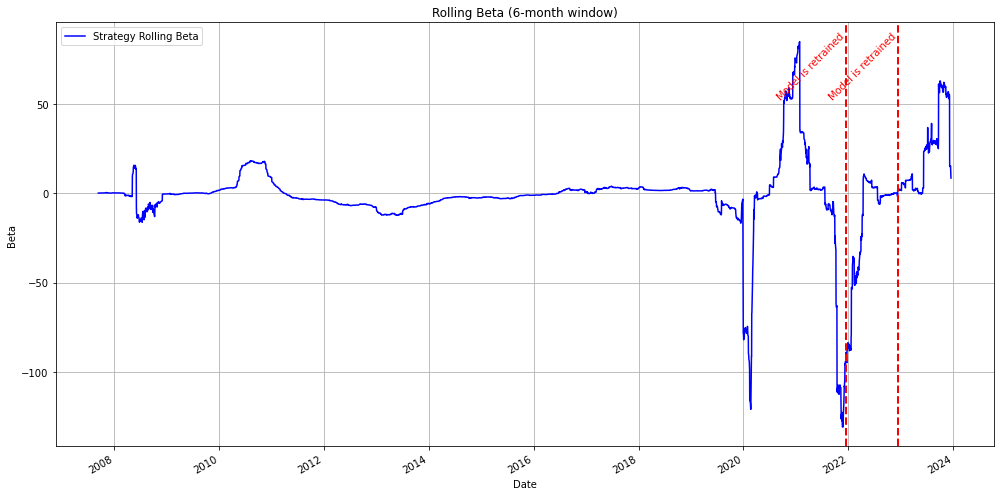

In [15]:
window = 126  # 6 months rolling window

# Prepare the benchmark returns with an intercept for OLS regression
benchmark_returns_with_const = sm.add_constant(benchmark_returns)

# Initialize an empty DataFrame to store the rolling beta
rolling_beta = pd.Series(index=strategy_returns.index)

# Perform the rolling regression
for end in range(window, len(strategy_returns) + 1):
    start = end - window
    y = strategy_returns[start:end]
    X = benchmark_returns_with_const[start:end]
    model = sm.OLS(y, X).fit()
    rolling_beta[end-1] = model.params[1]  # params[0] is the intercept, params[1] is the beta

# Plot the rolling beta
plt.figure(figsize=(14, 7))
rolling_beta.plot(label='Strategy Rolling Beta', color='blue')
plt.title('Rolling Beta (6-month window)')
plt.ylabel('Beta')
plt.xlabel('Date')
plt.grid(True)

# Add vertical red lines for model retraining dates
retrain_dates = [date(2021, 12, 15), date(2022, 12, 15)]
for retrain_date in retrain_dates:
    plt.axvline(x=retrain_date, color='red', linestyle='--', lw=2)

# Dynamically adjust the vertical position for annotations to avoid intersection
adjustment_factor = plt.ylim()[1] * 0.95  # Adjust this factor as needed

# Annotate the red lines, adjusting the y position
for retrain_date in retrain_dates:
    plt.text(retrain_date, adjustment_factor, 'Model is retrained', color='red', ha='right', va='top', rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\seidm\AppData\Local\Temp\tmphp3ohz2z\ipykernel_8604\2104972555.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rolling_beta = pd.Series(index=strategy_returns.index)


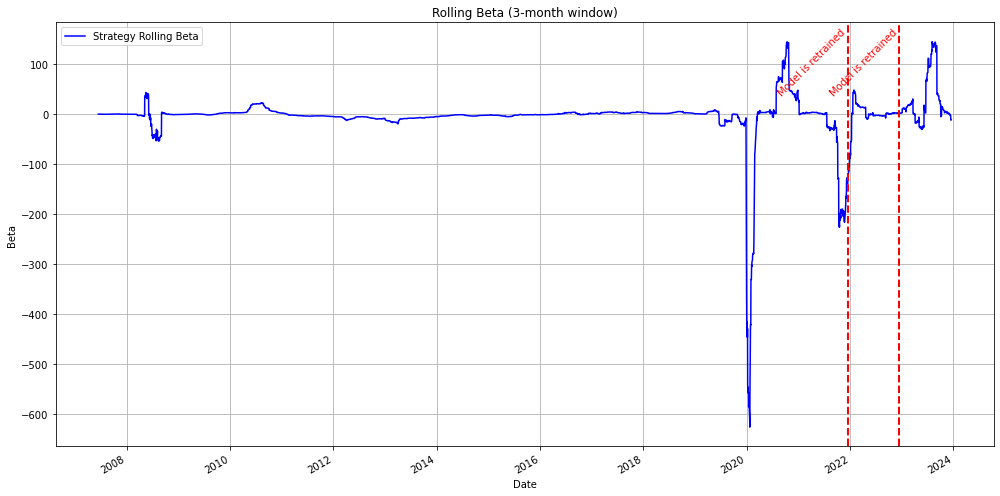

In [16]:
window = 63  # 3 months rolling window

# Prepare the benchmark returns with an intercept for OLS regression
benchmark_returns_with_const = sm.add_constant(benchmark_returns)

# Initialize an empty DataFrame to store the rolling beta
rolling_beta = pd.Series(index=strategy_returns.index)

# Perform the rolling regression
for end in range(window, len(strategy_returns) + 1):
    start = end - window
    y = strategy_returns[start:end]
    X = benchmark_returns_with_const[start:end]
    model = sm.OLS(y, X).fit()
    rolling_beta[end-1] = model.params[1]  # params[0] is the intercept, params[1] is the beta

# Plot the rolling beta
plt.figure(figsize=(14, 7))
rolling_beta.plot(label='Strategy Rolling Beta', color='blue')
plt.title('Rolling Beta (3-month window)')
plt.ylabel('Beta')
plt.xlabel('Date')
plt.grid(True)

# Add vertical red lines for model retraining dates
retrain_dates = [date(2021, 12, 15), date(2022, 12, 15)]
for retrain_date in retrain_dates:
    plt.axvline(x=retrain_date, color='red', linestyle='--', lw=2)

# Dynamically adjust the vertical position for annotations to avoid intersection
adjustment_factor = plt.ylim()[1] * 0.95  # Adjust this factor as needed

# Annotate the red lines, adjusting the y position
for retrain_date in retrain_dates:
    plt.text(retrain_date, adjustment_factor, 'Model is retrained', color='red', ha='right', va='top', rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

# Distance between porfolio weights

In [105]:
perf['weights']

2020-12-15 21:00:00+00:00                                                  NaN
2020-12-16 21:00:00+00:00                                                  NaN
2020-12-17 21:00:00+00:00                                                  NaN
2020-12-18 21:00:00+00:00                                                  NaN
2020-12-21 21:00:00+00:00    [-0.03311106562614441, 0.48139920830726624, -0...
                                                   ...                        
2023-12-11 21:00:00+00:00    [0.06416240334510803, 0.2581533193588257, -0.0...
2023-12-12 21:00:00+00:00    [0.06416240334510803, 0.2581533193588257, -0.0...
2023-12-13 21:00:00+00:00    [0.06416240334510803, 0.2581533193588257, -0.0...
2023-12-14 21:00:00+00:00    [0.06416240334510803, 0.2581533193588257, -0.0...
2023-12-15 21:00:00+00:00    [0.06416240334510803, 0.2581533193588257, -0.0...
Name: weights, Length: 758, dtype: object

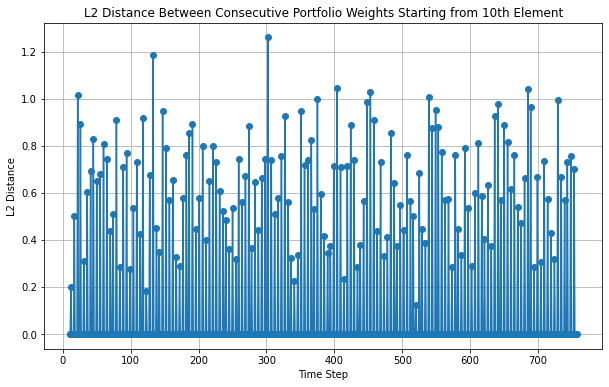

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example 'perf' DataFrame setup for demonstration; replace with your actual data
# perf = pd.DataFrame({
#     'weights': [
#         np.array([0.1, 0.9]),
#         np.array([0.2, 0.8]),
#         np.array([0.25, 0.75]),
#         # Your actual weight arrays
#     ]
# })

# Function to calculate L2 distance between two arrays
def calculate_l2_distance(arr1, arr2):
    return np.sqrt(np.sum((arr1 - arr2) ** 2))

# Start from the 10th element (index 9 since indexing starts at 0)
start_index = 9

# Calculate L2 distances starting from the 10th element
l2_distances = np.array([
    calculate_l2_distance(
    np.array(ast.literal_eval(perf['weights'][i])), 
    np.array(ast.literal_eval(perf['weights'][i+1]))
)
    for i in range(start_index, len(perf['weights']) - 1)
])

#l2_distances = l2_distances[l2_distances != 0]

# Plotting the L2 distances
plt.figure(figsize=(10, 6))
plt.plot(range(start_index + 1, start_index + len(l2_distances) + 1), l2_distances, marker='o', linestyle='-')
plt.title('L2 Distance Between Consecutive Portfolio Weights Starting from 10th Element')
plt.xlabel('Time Step')
plt.ylabel('L2 Distance')
plt.grid(True)
plt.show()


In [193]:
l2_distances.mean()

0.12900128847006212

In [194]:
perf['weights'][6]

'[-0.30313897132873535, 0.7989324331283569, -0.32069849967956543, 0.4154183268547058, 0.40948671102523804]'

In [42]:
def compute_average_weight(perf):
    weights_array = np.array([ast.literal_eval(weights) for weights in perf['weights'][5:]])

    # Calculate the average weight per column
    average_weights_per_column = np.mean(weights_array, axis=0)

    return average_weights_per_column

In [43]:
for p in [perf, benchmark, eqp_perf]:
    print(compute_average_weight(p))

[-0.01693561  0.36124353  0.12549709  0.39137963  0.13881536]
[0. 1. 0. 0. 0.]
[0.2 0.2 0.2 0.2 0.2]


In [44]:
sum(compute_average_weight(perf))

0.9999999922071304

# 